# Applying ETL fundamentals with weather data

<font color='yellow'>Project description:</font> apply ETL concepts to treat a database with meteorological information before applying data analysis.

<font color='yellow'>Directory for the database:</font> displayed in the project folder.

<font color='yellow'>Languages used for this project:</font> Python.

<font color='yellow'>Project information:</font>
* Database: tempo.csv
* Valid entries:
    * Weather condition (Aparencia): sol (sunny), nublado (coudy), chuva (rainy)
    * Temperature (Temperatura): -130 to 130 (°F)
    * Relative humidity (Umidade): 0 to 100 (%)
    * Wind (Vento): True (VERDADEIRO) or False (FALSO)
    * Possibility to go out to play (Jogar): Yes (sim) or No (nao)

In [1]:
# Importing the required libraries:
import pandas as pd
import seaborn as srn
import statistics as sts

In [2]:
# Understanding the dataset:
dataset = pd.read_csv('tempo.csv', sep = ';')
dataset

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,NaN,sim


In [3]:
dataset.shape

(14, 5)

In [4]:
# Checking for the presence of null data:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [5]:
# Working with the "Aparencia" Column:
aparencia_analysis = dataset.groupby(['Aparencia']).size()
aparencia_analysis

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [6]:
# Replace the "menos" variable in the "Aparencia" column with the "sol" mode
dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = 'sol'
aparencia_analysis = dataset.groupby(['Aparencia']).size()
aparencia_analysis

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

Temperatura
64      1
65      1
68      1
69      1
70      1
71      1
72      1
75      2
80      1
81      1
83      1
85      1
1220    1
dtype: int64

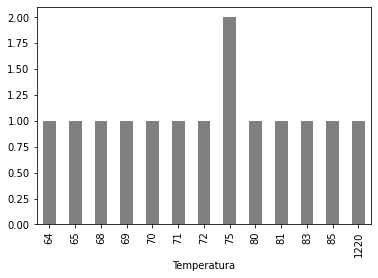

In [7]:
# Working with the "Temperatura" Column:
temperatura_analysis = dataset.groupby(['Temperatura']).size()
temperatura_analysis.plot.bar(color = 'gray')
temperatura_analysis

Temperatura
64.0    1
65.0    1
68.0    1
69.0    1
70.0    1
71.0    1
72.0    1
73.5    1
75.0    2
80.0    1
81.0    1
83.0    1
85.0    1
dtype: int64

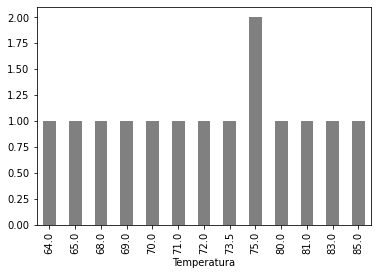

In [8]:
# Replace parameter "1220" with the median:
median = sts.median(dataset['Temperatura'])
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130), 'Temperatura'] = median
temperatura_analysis = dataset.groupby(['Temperatura']).size()
temperatura_analysis.plot.bar(color = 'gray')
temperatura_analysis

In [9]:
# Working with the "Umidade" Column:
umidade_analysis = dataset.groupby(['Umidade']).size()
umidade_analysis

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

Umidade
65.0    1
70.0    3
75.0    1
80.0    1
85.0    1
85.5    2
86.0    1
90.0    2
91.0    1
95.0    1
dtype: int64

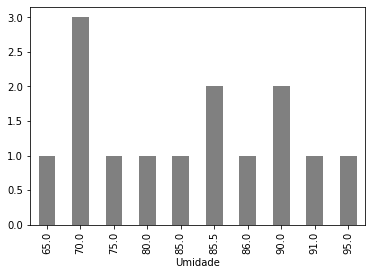

In [10]:
# We check for a strange data greater than the maximum limit of 100, and we already know that there is a null data, so let's replace it with the median:
median = sts.median(dataset['Umidade'])
dataset['Umidade'].fillna(median, inplace=True)
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100), 'Umidade'] = median
umidade_analysis = dataset.groupby(['Umidade']).size()
umidade_analysis.plot.bar(color = 'gray')
umidade_analysis

In [11]:
# Working with the "Vento" Column:
vento_analysis = dataset.groupby(['Vento']).size()
vento_analysis

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

Vento
FALSO         8
VERDADEIRO    6
dtype: int64

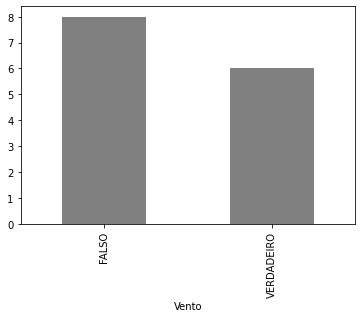

In [12]:
# We have already noticed that there is a null data, so let's replace it with the mode "FALSE":
dataset['Vento'].fillna('FALSO', inplace=True)
vento_analysis = dataset.groupby(['Vento']).size()
vento_analysis.plot.bar(color = 'gray')
vento_analysis

In [13]:
# Working with the "Jogar" Column:
jogar_analysis = dataset.groupby(['Jogar']).size()
jogar_analysis

Jogar
nao    5
sim    9
dtype: int64

In [14]:
# No changes are needed

In [15]:
# Dataset prepared for data analysis:
dataset

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
5,chuva,65.0,70.0,VERDADEIRO,nao
6,sol,64.0,65.0,VERDADEIRO,sim
7,sol,73.5,95.0,FALSO,nao
8,sol,69.0,70.0,FALSO,sim
9,chuva,75.0,85.5,FALSO,sim
